In [15]:
import pandas as pd

con = pd.read_excel('data/ConcreteStrength.xlsx', skiprows=10, index_col=0)

con.rename(columns={'Fly ash': 'FlyAsh', 'Coarse Aggr.': "CoarseAgg",
                    'Fine Aggr.': 'FineAgg', 'Air Entrainment': 'AirEntrain', 
                    'Compressive Strength (28-day)(Mpa)': 'Strength'}, inplace=True)

con.index.name = None
con

c:\Users\henri\source\repos\Python\Pandas\CodeAlong_12Mars - dashborad\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,AirEntrain,Strength
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,No,34.990000
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,Yes,32.272286
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,Yes,35.450356
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,No,42.080000
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,No,26.820000
...,...,...,...,...,...,...,...,...,...
99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,No,49.970000
100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,No,50.230000
101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,Yes,43.460575
102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,Yes,44.639464


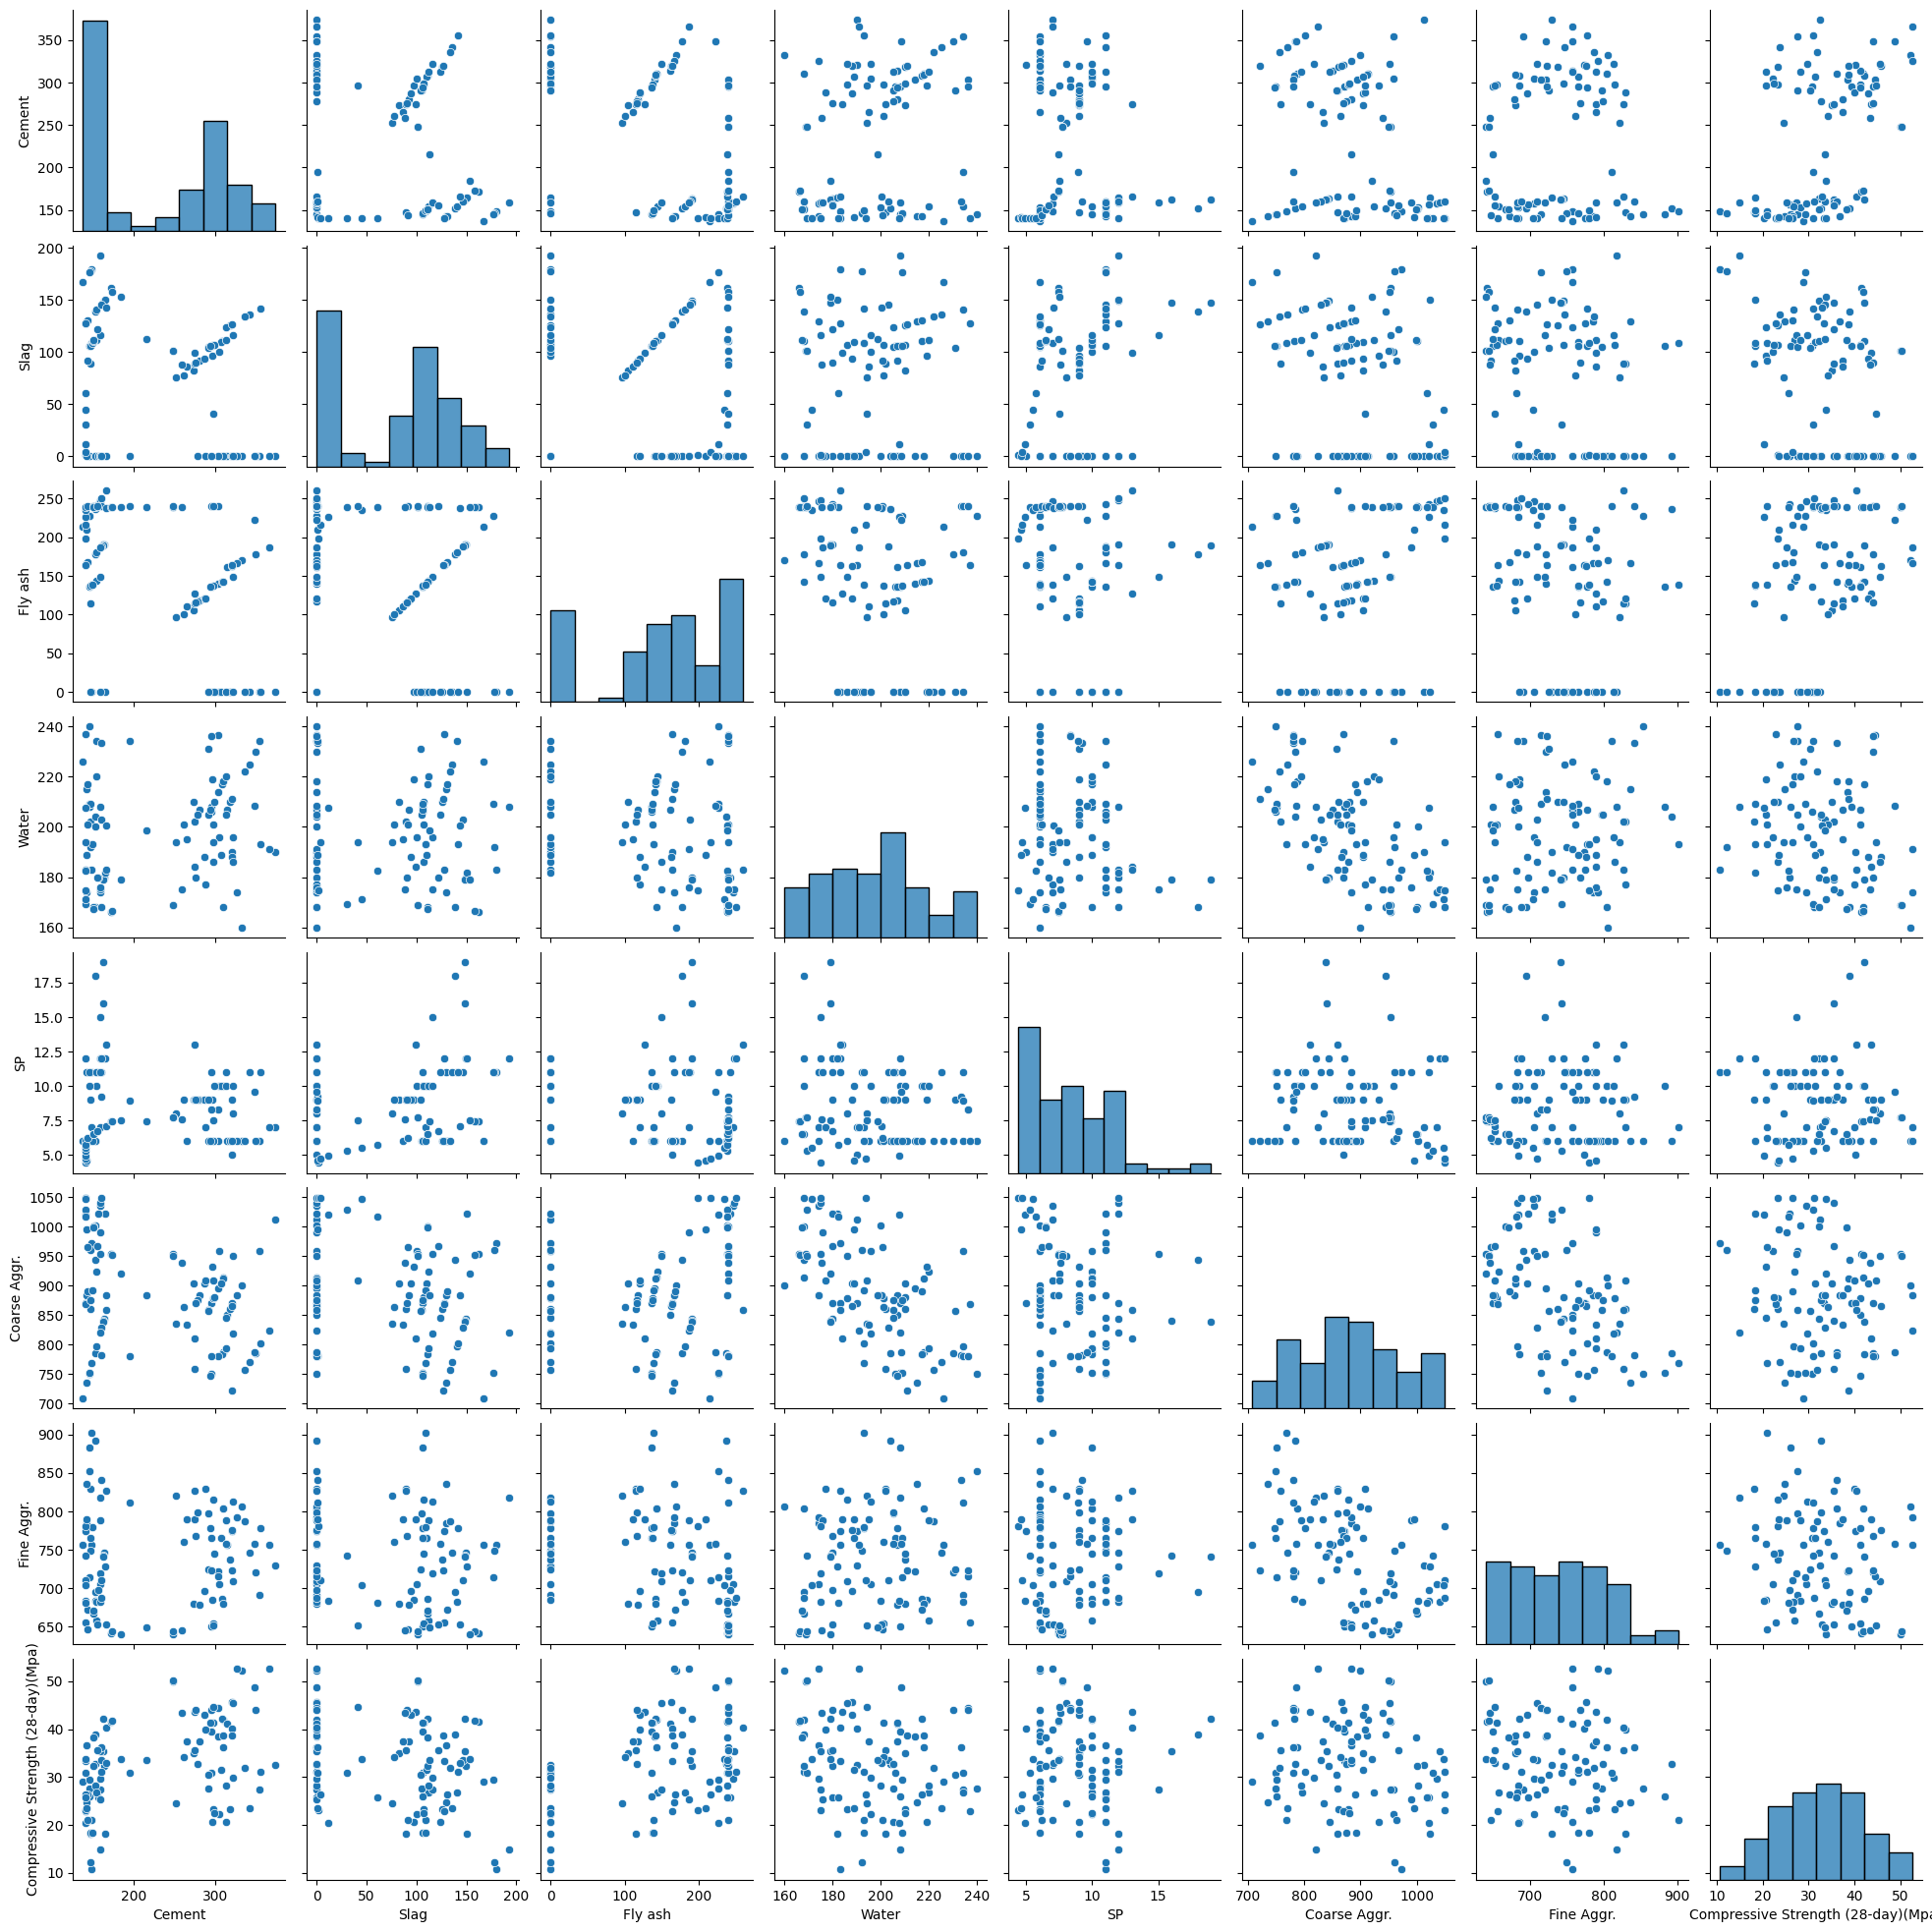

In [5]:
import seaborn as sns

sns.pairplot(con)


In [8]:
# calcylate correlation ---> a single number to indicate relationship of two variables

from scipy import stats



In [17]:
con.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 1 to 103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cement      103 non-null    float64
 1   Slag        103 non-null    float64
 2   FlyAsh      103 non-null    float64
 3   Water       103 non-null    float64
 4   SP          103 non-null    float64
 5   CoarseAgg   103 non-null    float64
 6   FineAgg     103 non-null    float64
 7   AirEntrain  103 non-null    object 
 8   Strength    103 non-null    float64
dtypes: float64(8), object(1)
memory usage: 8.0+ KB


In [18]:
con.columns

Index(['Cement', 'Slag', 'FlyAsh', 'Water', 'SP', 'CoarseAgg', 'FineAgg',
       'AirEntrain', 'Strength'],
      dtype='object')

In [16]:
# calcylate one correlation
stats.pearsonr(con["Cement"], con["Strength"])

PearsonRResult(statistic=np.float64(0.45535572489653336), pvalue=np.float64(1.3462794464570055e-06))

In [23]:
# calcylate more correlations at one go
cormat = con[['Cement', 'Slag', 'FlyAsh', 'Water', 'SP', 'CoarseAgg', 'FineAgg', 'Strength']].corr()
cormat

,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.455356
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.332183
FlyAsh,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,0.406390
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,-0.222723
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.016838
CoarseAgg,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.145925
FineAgg,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,-0.169529
Strength,0.455356,-0.332183,0.406390,-0.222723,-0.016838,-0.145925,-0.169529,1.000000


<Axes: >

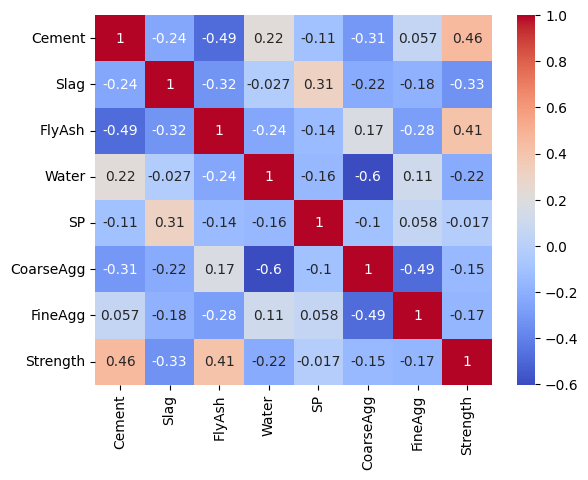

In [29]:
# visualize all correlations with heatmap
sns.heatmap(cormat, annot=True, cmap='coolwarm')